We need to build a network with three hidden layers consisting of two convolutional layers followed by a 
pooling layer and a fully connected dense layer at the end. 
Here is a list of all hyperparameters that must be determined:

• number of filters in both layers (nf1,nf2)

• filter size in both layers (ks1,ks2)

• strides in both layers (st1,st2)

• the number of units in the dense layer (n_units)

• the number of epochs (epochs)

• batch size (batch_size)

• learning rate in the ADAM algorithm (lrt)

• Whether to drop out or not.

## Loading the data and other imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
digits = load_digits(return_X_y =True)
X=digits[0]
y=digits[1]

## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Explore the data

In [ ]:
X_train=X_train.reshape((X_train.shape[0],8,8,1))
X_test=X_test.reshape((X_test.shape[0],8,8,1))

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1437, 8, 8, 1)
(1437,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(360, 8, 8, 1)
(360,)


## Preprocess the data:

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Creating the Model:

In [ ]:
def bl_model(nf1,nf2,ks1,ks2,st1,st2,n_units,lrt):
  model=keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters=nf1, kernel_size=ks1, strides=st1, activation='elu', input_shape=(8,8,1), padding='same'))
  model.add(keras.layers.Conv2D(filters=nf2, kernel_size=ks2, strides=st2, activation='relu'))
  model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same' ))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(n_units, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(lr=lrt), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return(model)

In [ ]:
#Test the model with out randomized search
#Model = bl_model(nf1 = 50, nf2 = 150 ,ks1 = 3, ks2 = 3 , n_units = 100, lrt = 0.01)
#Model.summary() # Get a summary of your model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 50)          500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 150)         67650     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 150)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1350)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               135100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 204,260
Trainable params: 204,260
Non-trainable params: 0
__________________________________________________

In [ ]:
#simple hyperparameters  to test
#params={'nf1':[32],'nf2':[256],'ks1':[3],'ks2':[3],'n_units':[128],'lrt':[0.001],'st1':[1,2],'st2':[1,2],'epochs':[10],'batch_size':[120]}

In [ ]:
# Define hyperparameter space
params={'nf1':[16, 32, 64, 128, 256, 400],
        'nf2':[16, 32, 64, 128, 256, 400],
        'ks1':[3,5],
        'ks2':[3,5],
        'n_units':[50,100,200],
        'lrt':[0.001,0.05,0.01],
        'st1':[1,2],
        'st2':[1,2],
        'epochs':[5, 10, 20],
        'batch_size':[20, 50, 150, 350]}

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
final_model=KerasClassifier(bl_model)

In [ ]:
# Create grid search
from sklearn.model_selection import RandomizedSearchCV
cnn_search=RandomizedSearchCV(final_model,param_distributions=params, n_iter=10, scoring='accuracy', cv=5)
# Fit grid search
cnn_search.fit(X_train,y_train,validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 13s 2s/step - loss: 2.4730 - accuracy: 0.1190 - val_loss: 2.3483 - val_accuracy: 0.0522
Epoch 2/10
7/7 [==============================] - 13s 2s/step - loss: 2.3153 - accuracy: 0.1064 - val_loss: 2.2720 - val_accuracy: 0.1043
Epoch 3/10
7/7 [==============================] - 13s 2s/step - loss: 2.2155 - accuracy: 0.1963 - val_loss: 1.9968 - val_accuracy: 0.3826
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 1.6927 - accuracy: 0.4507 - val_loss: 1.2480 - val_accuracy: 0.6000
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.9533 - accuracy: 0.6983 - val_loss: 0.6886 - val_accuracy: 0.7565
Epoch 6/10
7/7 [==============================] - 14s 2s/step - loss: 0.5482 - accuracy: 0.8056 - val_loss: 0.5098 - val_accuracy: 0.8522
Epoch 7/10
7/7 [==============================] - 14s 2s/step - loss: 0.3511 - accuracy: 0.8830 - val_loss: 0.2843 - val_accuracy: 0.8957
Epoch 8/10
7/7 [==================

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc0940826d8>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [20, 50, 150, 350],
                                        'epochs': [5, 10, 20], 'ks1': [3, 5],
                                        'ks2': [3, 5],
                                        'lrt': [0.001, 0.05, 0.01],
                                        'n_units': [50, 100, 200],
                                        'nf1': [16, 32, 64, 128, 256, 400],
                                        'nf2': [16, 32, 64, 128, 256, 400],
                                        'st1': [1, 2], 'st2': [1, 2]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

### Finding the best hyperparameters:

In [ ]:
# View hyperparameters of best neural network
print("Best parameters: {}".format(cnn_search.best_params_))

Best parameters: {'st2': 1, 'st1': 1, 'nf2': 128, 'nf1': 32, 'n_units': 100, 'lrt': 0.01, 'ks2': 5, 'ks1': 3, 'epochs': 5, 'batch_size': 150}


### Evaluating cross validation accuracy:

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(cnn_search.best_score_))
print("Best test accuracy: {:.2f}".format(cnn_search.score(X_test, y_test)))

Best cross-validation accuracy: 0.95
Best test accuracy: 0.95


### Fitting the best parameter:

In [ ]:
final_model=cnn_search.best_estimator_.fit(X_train, y_train,validation_split=0.1)

Epoch 1/5
9/9 [==============================] - 0s 53ms/step - loss: 2.2446 - accuracy: 0.1787 - val_loss: 1.8693 - val_accuracy: 0.4306
Epoch 2/5
9/9 [==============================] - 0s 39ms/step - loss: 1.2349 - accuracy: 0.6272 - val_loss: 0.6854 - val_accuracy: 0.7847
Epoch 3/5
9/9 [==============================] - 0s 40ms/step - loss: 0.5329 - accuracy: 0.8306 - val_loss: 0.3607 - val_accuracy: 0.8889
Epoch 4/5
9/9 [==============================] - 0s 39ms/step - loss: 0.2462 - accuracy: 0.9134 - val_loss: 0.2958 - val_accuracy: 0.8819
Epoch 5/5
9/9 [==============================] - 0s 39ms/step - loss: 0.1991 - accuracy: 0.9343 - val_loss: 0.1355 - val_accuracy: 0.9583


### Evaluating Model Performance:

In [ ]:
print("Test set score: {:.2f}".format(cnn_search.best_estimator_.score(X_test, y_test)))

3/3 [==============================] - 0s 8ms/step - loss: 0.2291 - accuracy: 0.9472
Test set score: 0.95


### View final model summary

In [ ]:
new_model = final_model.model

In [ ]:
new_model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 4, 4, 128)         102528    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_73 (Dense)             (None, 10)                1010      
Total params: 155,158
Trainable params: 155,158
Non-trainable params: 0
_______________________________________________

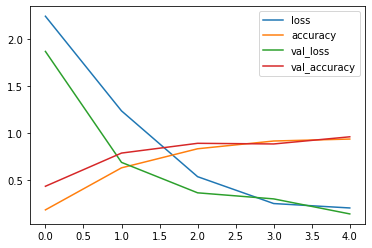

In [ ]:
model_loss = pd.DataFrame(final_model.history)
model_loss.plot()

### Evaluating Model Performance:

In [ ]:
loss, acc = new_model.evaluate(X_test, y_test,verbose=0)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))


Testing loss: 0.23, acc: 0.95%


In [ ]:
loss, acc = new_model.evaluate(X_train, y_train)
print('\nTraining loss: %.2f, acc: %.2f%%'%(loss, acc))

45/45 [==============================] - 0s 4ms/step - loss: 0.0924 - accuracy: 0.9763

Training loss: 0.09, acc: 0.98%


In [ ]:
predicted_classes = new_model.predict_classes(X_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test)

predicted:
[6 4 2 2 0 3 7 5 0 1 3 5 5 7 2 7 0 6 1 9 5 4 3 6 7 8 5 0 3 3 0 7 5 1 1 4 4
 0 8 3 1 1 5 8 5 1 9 4 5 3 6 3 0 2 3 9 7 1 4 1 8 9 0 8 1 0 2 3 3 2 1 1 3 4
 8 3 7 3 6 9 2 7 6 8 1 9 5 0 5 3 8 4 7 8 7 2 4 2 4 7 0 7 7 7 7 3 6 3 8 5 6
 6 4 1 2 2 8 7 2 3 5 0 2 4 5 8 8 5 2 0 0 1 5 7 8 4 8 1 2 2 5 8 4 8 7 1 8 9
 5 8 2 5 5 4 8 7 8 2 0 0 3 9 0 9 6 9 1 7 9 6 6 3 2 6 8 1 8 6 7 2 8 3 2 0 9
 1 9 3 9 2 2 6 4 5 1 7 4 6 1 4 9 4 3 0 4 9 6 2 3 9 8 0 0 3 1 2 3 3 2 0 6 9
 9 6 2 8 2 6 9 2 5 4 2 2 0 8 2 3 3 0 9 7 2 5 2 0 5 1 4 7 1 9 7 4 6 9 1 3 6
 6 3 3 3 0 5 2 5 0 7 6 5 8 3 8 7 2 1 3 5 8 8 5 5 2 1 3 5 6 7 6 6 4 2 8 8 5
 1 9 7 7 8 7 3 9 4 5 6 6 4 3 7 1 2 2 9 9 6 7 6 0 5 0 6 0 6 1 4 3 5 3 8 5 5
 5 8 6 4 6 4 9 0 6 3 6 5 8 4 3 8 0 4 7 1 6 4 5 7 2 6 7]
True Label:
[6 4 2 2 0 3 7 5 0 1 3 5 5 7 2 7 0 6 1 9 5 1 3 6 7 8 5 0 3 3 0 7 5 1 1 4 4
 0 8 3 1 1 5 8 5 1 9 4 5 3 6 3 0 2 9 9 7 1 4 1 8 9 0 6 6 0 2 9 3 2 1 1 3 4
 8 3 7 3 6 9 2 4 6 8 1 9 5 0 5 3 8 4 7 8 7 2 4 2 4 7 0 7 7 7 7 9 6 3 8 5 6
 6 4 1 2 2 8 7 2 3 5 

### Visualize Training History

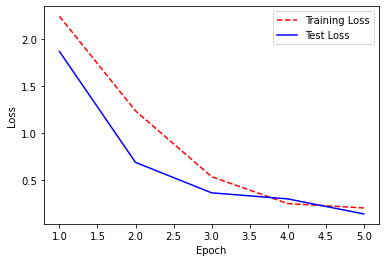

In [ ]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = final_model.history["loss"]
test_loss = final_model.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

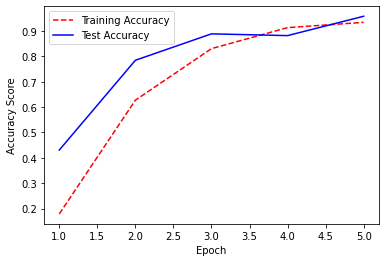

In [ ]:
# Get training and test accuracy histories
training_accuracy = final_model.history["accuracy"]
test_accuracy = final_model.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

### Compute the mean and standard deviation of the best CNN model accuracy for 1000 times:

In [ ]:
test_cnn_acc = []

for i in range(1000):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Reshape inputs
    X_train=X_train.reshape((X_train.shape[0],8,8,1))
    X_test=X_test.reshape((X_test.shape[0],8,8,1))
    
    #Preprocess data
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    #Fit model on training data
    cnn_search.best_estimator_.fit(X_train, y_train,validation_split=0.1)
    
    # Evaluate model on test data
    acc = cnn_search.best_estimator_.score(X_test, y_test)
    test_cnn_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_cnn_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_cnn_acc)))

Streaming output truncated to the last 5000 lines.
Epoch 5/5
3/3 [==============================] - 0s 11ms/step - loss: 0.0808 - accuracy: 0.9833
Epoch 1/5
9/9 [==============================] - 1s 76ms/step - loss: 2.1152 - accuracy: 0.2753 - val_loss: 1.3192 - val_accuracy: 0.6875
Epoch 2/5
9/9 [==============================] - 1s 65ms/step - loss: 0.9433 - accuracy: 0.7022 - val_loss: 0.4538 - val_accuracy: 0.8681
Epoch 3/5
9/9 [==============================] - 1s 70ms/step - loss: 0.3685 - accuracy: 0.8840 - val_loss: 0.1633 - val_accuracy: 0.9583
Epoch 4/5
9/9 [==============================] - 1s 66ms/step - loss: 0.1818 - accuracy: 0.9404 - val_loss: 0.1011 - val_accuracy: 0.9722
Epoch 5/5
3/3 [==============================] - 0s 11ms/step - loss: 0.1864 - accuracy: 0.9444
Epoch 1/5
9/9 [==============================] - 1s 78ms/step - loss: 2.0967 - accuracy: 0.2738 - val_loss: 1.2405 - val_accuracy: 0.7222
Epoch 2/5
9/9 [==============================] - 1s 66ms/step - los

### Compute the mean and standard deviation of the best CNN model accuracy for 1000 times in other way:

In [ ]:
#Create model with the best hyperparameters
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=400, kernel_size=5, strides=1, activation='elu', input_shape=(8,8,1), padding='same'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same' ))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
test_cnn_acc = []

for i in range(10):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Reshape inputs
    X_train=X_train.reshape((X_train.shape[0],8,8,1))
    X_test=X_test.reshape((X_test.shape[0],8,8,1))
    
    #Fit model on training data
    #cnn_search.best_estimator_.fit(X_train, y_train,validation_split=0.1)
    history = model.fit(X_train, y_train, epochs=10,batch_size=20,verbose=2,validation_split=0.1)
    
    # Evaluate model on test data
    #acc = cnn_search.best_estimator_.score(X_test, y_test)
    #acc=history.score(X_test, y_test)
    #acc=model.evaluate(X_test,y_test)
    acc = history.history['accuracy']
    test_cnn_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_cnn_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_cnn_acc)))

Epoch 1/10
65/65 - 2s - loss: 0.1400 - accuracy: 0.9930 - val_loss: 0.3893 - val_accuracy: 0.9722
Epoch 2/10
65/65 - 2s - loss: 0.1520 - accuracy: 0.9876 - val_loss: 0.0713 - val_accuracy: 0.9861
Epoch 3/10
65/65 - 2s - loss: 0.1237 - accuracy: 0.9853 - val_loss: 0.4228 - val_accuracy: 0.9792
Epoch 4/10
65/65 - 2s - loss: 0.1350 - accuracy: 0.9899 - val_loss: 0.9694 - val_accuracy: 0.9653
Epoch 5/10
65/65 - 2s - loss: 0.2009 - accuracy: 0.9845 - val_loss: 0.3423 - val_accuracy: 0.9792
Epoch 6/10
65/65 - 2s - loss: 0.0874 - accuracy: 0.9923 - val_loss: 0.2084 - val_accuracy: 0.9861
Epoch 7/10
65/65 - 2s - loss: 0.0089 - accuracy: 0.9992 - val_loss: 0.7897 - val_accuracy: 0.9792
Epoch 8/10
65/65 - 2s - loss: 0.0779 - accuracy: 0.9961 - val_loss: 0.3660 - val_accuracy: 0.9792
Epoch 9/10
65/65 - 2s - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.5203 - val_accuracy: 0.9792
Epoch 10/10
65/65 - 2s - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.4567 - val_accuracy: 0.9861
Epoch 1/10
65/65 - 